In [225]:
import ast
def cargar_diccionario_desde_archivo(nombre_archivo):
    with open(nombre_archivo, 'r') as archivo:
        contenido = archivo.read()
        diccionario = ast.literal_eval(contenido)
    return diccionario

In [226]:
data_dict = cargar_diccionario_desde_archivo("data.txt")

In [227]:
print(next(iter(data_dict.values())))

['\nHarry, Ron, Hermione, Friendship, 0.7, "Harry offered to share his book with both of them,"\nHarry, Hermione, Annoyance, 0.4, "Hermione, meanwhile, was resolutely plowing on with what she called the \'official\' instructions, but becoming increasingly bad-tempered as they yielded poorer results than the Prince\'s."\nHarry, Ron, Friendship, 0.8, "Although Harry had offered to share his book with both of them, Ron had more difficulty deciphering the handwriting than Harry did, and could not keep asking Harry to read aloud or it might look suspicious."\nHarry, Hermione, Annoyance, 0.7, "Hermione seemed to have no answer to this. She merely scowled and twitched her essay on The Principles of Rematerialization away from Ron, who was trying to read it upside down."\nHarry, Hermione, Friendship, 0.9, "We\'ll wait up, we want to hear what he teaches you!"\nHarry, Ron, Friendship, 0.9, "Hope it goes okay," said Ron, and the pair of them watched Harry leave through the portrait hole.', '\nHa

In [228]:
lista_dicts = []
for capitulo, lista in data_dict.items():
    lista_interacciones = []
    for elem in lista:
        lista_separada = elem.split("\n")[1:]
        lista_interacciones.extend(lista_separada)
    clean_dict = {
        "Capitulo" : capitulo,
        "Lista_de_interacciones": lista_interacciones
    }
    lista_dicts.append(clean_dict)
print(lista_dicts)

[{'Capitulo': 'Chapter 10 - The house of count.txt', 'Lista_de_interacciones': ['Harry, Ron, Hermione, Friendship, 0.7, "Harry offered to share his book with both of them,"', 'Harry, Hermione, Annoyance, 0.4, "Hermione, meanwhile, was resolutely plowing on with what she called the \'official\' instructions, but becoming increasingly bad-tempered as they yielded poorer results than the Prince\'s."', 'Harry, Ron, Friendship, 0.8, "Although Harry had offered to share his book with both of them, Ron had more difficulty deciphering the handwriting than Harry did, and could not keep asking Harry to read aloud or it might look suspicious."', 'Harry, Hermione, Annoyance, 0.7, "Hermione seemed to have no answer to this. She merely scowled and twitched her essay on The Principles of Rematerialization away from Ron, who was trying to read it upside down."', 'Harry, Hermione, Friendship, 0.9, "We\'ll wait up, we want to hear what he teaches you!"', 'Harry, Ron, Friendship, 0.9, "Hope it goes okay,

In [229]:
def procesar_string(string):
    try:
        elementos = string.split(",")
        if elementos == [''] or elementos == []:
            return None
        idx = next((i for i, x in enumerate(elementos) if any(c.isdigit() for c in x)), len(elementos))
        nueva_lista = elementos[:idx] + [' '.join(elementos[idx:])]
        ultimo_elemento = nueva_lista[-1]
        numeros, texto = ultimo_elemento.split(maxsplit=1)
        nueva_lista = nueva_lista[:-1] + [numeros] + [texto]
        elementos = nueva_lista
        personajes = elementos[:-3]
        sentimiento = [elementos[-3]]
        intensidad = float(elementos[-2])
        return {"Personajes": personajes, "Sentimiento": sentimiento, "Intensidad": intensidad, "Texto": texto}
    except:
        return None


In [230]:
data_list = []
for diccionario in lista_dicts:
    lista_diccionario = []
    for string in diccionario["Lista_de_interacciones"]:
        exit = procesar_string(string)
        lista_diccionario.append(exit)
    clean_dict = {
        "Capitulo": diccionario['Capitulo'],
        "Interacciones": lista_diccionario
    }
    data_list.append(clean_dict)

In [231]:
print(data_list)

[{'Capitulo': 'Chapter 10 - The house of count.txt', 'Interacciones': [{'Personajes': ['Harry', ' Ron', ' Hermione'], 'Sentimiento': [' Friendship'], 'Intensidad': 0.7, 'Texto': '"Harry offered to share his book with both of them "'}, {'Personajes': ['Harry', ' Hermione'], 'Sentimiento': [' Annoyance'], 'Intensidad': 0.4, 'Texto': '"Hermione  meanwhile  was resolutely plowing on with what she called the \'official\' instructions  but becoming increasingly bad-tempered as they yielded poorer results than the Prince\'s."'}, {'Personajes': ['Harry', ' Ron'], 'Sentimiento': [' Friendship'], 'Intensidad': 0.8, 'Texto': '"Although Harry had offered to share his book with both of them  Ron had more difficulty deciphering the handwriting than Harry did  and could not keep asking Harry to read aloud or it might look suspicious."'}, {'Personajes': ['Harry', ' Hermione'], 'Sentimiento': [' Annoyance'], 'Intensidad': 0.7, 'Texto': '"Hermione seemed to have no answer to this. She merely scowled and

In [232]:
def procesar_diccionario(diccionario):
    if (diccionario == None):
        return None
    personajes = [p.strip() for p in diccionario["Personajes"]]
    personajes_convertidos = []
    for personaje in personajes:
        if personaje in ['Wall', 'Wood', 'Everyone', 'Weather', 'Newspaper', 'Snowy Owl', 'Woman', 'Handsome Young Man', 'Parents', 'Boys', 'Gryffindor', 'The Bust of the Ugly Old Warlock', 'Them', 'Girls', 'Girl', 'small boy', 'Professor', 'Fat Lady']:
            return None
        if personaje == "Potter":
            personaje = "Harry Potter"
        elif personaje == "Harry":
            personaje = "Harry Potter"
        elif personaje == "Malfoy and Borgin":
            personaje = "Draco Malfoy"
        elif personaje == "Malfoy and Fenrir Greyback":
            personaje = "Draco Malfoy"
        elif personaje == "Professor Dumbledore":
            personaje = "Albus Dumbledore"
        elif personaje == "R.A.B.":
            personaje = "Regulus Arcturus Black"
        elif personaje == "Professor Snape":
            personaje = "Severus Snape"
        elif personaje == "Voldemort":
            personaje = "Lord Voldemort"
        elif personaje == "Hermione":
            personaje = "Hermione Granger"
        elif personaje == "Tom":
            personaje = "Tom Riddle"
        elif personaje == "Dursleys":
            personaje = "The Dursleys"
        elif personaje == "McGonagall":
            personaje = "Minerva McGonagall"
        elif personaje == "Professor Slughorn":
            personaje = "Horace Slughorn"
        elif personaje == "Fred":
            personaje = "Fred Weasley"
        elif personaje == "Mrs. Weasley":
            personaje = "Molly Weasley"
        elif personaje == "Ron":
            personaje = "Ron Weasley"
        elif personaje == "Lavender":
            personaje = "Lavender Brown"
        elif personaje == "Tonks":
            personaje = "Nymphadora Tonks"
        elif personaje == "Bellatrix":
            personaje = "Bellatrix Lestrange"
        elif personaje == "Hepzibah":
            personaje = "Hepzibah Smith"
        elif personaje == "Horace":
            personaje = "Horace Slughorn"
        elif personaje == "Bellatrix and Narcissa":
            personaje = "Bellatrix Lestrange"
        elif personaje == "Dudley":
            personaje = "Dudley Dursley"
        elif personaje == "Percy":
            personaje = "Percy Weasley"
        elif personaje == "Room of Requirement":
            personaje = "The Room of Requirement"
        elif personaje == "Draco":
            personaje = "Draco Malfoy"
        elif personaje == "Malfoy":
            personaje = "Draco Malfoy"
        elif personaje == "Snape":
            personaje = "Severus Snape"
        elif personaje == "Molly":
            personaje = "Molly Weasley"
        elif personaje == "and Hermione":
            personaje = "Hermione Granger"
        elif personaje == "Dumbledore":
            personaje = "Albus Dumbledore"
        elif personaje == "Bella":
            personaje = "Bellatrix Lestrange"
        elif personaje == "Riddle":
            personaje = "Tom Riddle"
        elif personaje == "Slughorn":
            personaje = "Horace Slughorn"
        elif personaje == "Vernon":
            personaje = "Vernon Dursley"
        elif personaje == "Uncle Vernon":
            personaje = "Vernon Dursley"
        elif personaje == "Mr. Weasley":
            personaje = "Arthur Weasley"
        elif personaje == "Mr.Weasley":
            personaje = "Arthur Weasley"
        elif personaje == "Mr Weasley":
            personaje = "Arthur Weasley"
        elif personaje == "Professor McGonagall":
            personaje = "Minerva McGonagall"

        personajes_convertidos.append(personaje)
    sentimiento = [s.strip() for s in diccionario["Sentimiento"]]
    intensidad = diccionario["Intensidad"]
    texto = diccionario["Texto"][1:-1]
    return {"Personajes": personajes_convertidos, "Sentimiento": sentimiento, "Intensidad": intensidad, "Texto": texto}







In [233]:
print(procesar_diccionario({'Personajes': ['Harry', ' Ron', ' Hermione'], 'Sentimiento': [' Friendship'], 'Intensidad': 0.7, 'Texto': '"Harry offered to share his book with both of them "'}))

{'Personajes': ['Harry Potter', 'Ron Weasley', 'Hermione Granger'], 'Sentimiento': ['Friendship'], 'Intensidad': 0.7, 'Texto': 'Harry offered to share his book with both of them '}


In [234]:
def fix_spaces(lista_diccionarios):
    for diccionario in lista_diccionarios:
        interacciones_lst = diccionario['Interacciones']
        for interaccion in interacciones_lst:
            interaccion_actualizada = procesar_diccionario(interaccion)
            interacciones_lst[interacciones_lst.index(interaccion)] = interaccion_actualizada
    return lista_diccionarios



In [235]:
nueva_ger = fix_spaces(data_list)
print(nueva_ger)

[{'Capitulo': 'Chapter 10 - The house of count.txt', 'Interacciones': [{'Personajes': ['Harry Potter', 'Ron Weasley', 'Hermione Granger'], 'Sentimiento': ['Friendship'], 'Intensidad': 0.7, 'Texto': 'Harry offered to share his book with both of them '}, {'Personajes': ['Harry Potter', 'Hermione Granger'], 'Sentimiento': ['Annoyance'], 'Intensidad': 0.4, 'Texto': "Hermione  meanwhile  was resolutely plowing on with what she called the 'official' instructions  but becoming increasingly bad-tempered as they yielded poorer results than the Prince's."}, {'Personajes': ['Harry Potter', 'Ron Weasley'], 'Sentimiento': ['Friendship'], 'Intensidad': 0.8, 'Texto': 'Although Harry had offered to share his book with both of them  Ron had more difficulty deciphering the handwriting than Harry did  and could not keep asking Harry to read aloud or it might look suspicious.'}, {'Personajes': ['Harry Potter', 'Hermione Granger'], 'Sentimiento': ['Annoyance'], 'Intensidad': 0.7, 'Texto': 'Hermione seemed 

In [260]:
import pandas as pd

# Crear una lista de listas con la información de cada interacción
interacciones = []
for d in nueva_ger:
    capitulo = d['Capitulo']
    for i in d['Interacciones']:
        if (i == None):
            continue
        personajes = ', '.join(i['Personajes'])
        sentimiento = ', '.join(i['Sentimiento'])
        intensidad = i['Intensidad']
        texto = i['Texto']
        interacciones.append([capitulo, personajes, sentimiento, intensidad, texto])

# Crear el DataFrame
df3 = pd.DataFrame(interacciones, columns=['Capitulo', 'Personajes', 'Sentimiento', 'Intensidad', 'Texto'])


In [264]:
sentimientos_validos = ['Friendship', 'Annoyance', 'Gratitude', 'Surprise', 'Angry', 'Curiosity', 'Fear', 'Anxiety', 'Happy', 'Sad', 'Amusement', 'Resignation', 'Anger', 'Interest', 'Enmity', 'Disgust', 'Exasperation', 'Understanding', 'Resentment', 'Surprised', 'Envy', 'Suspicion', 'Betrayal', 'Amused', 'Excitement', 'Shock', 'Urgency', 'Grateful','Puzzled', 'Pain', 'Loathing', 'Concern', 'Stubborn', 'Relief', 'Romance', 'Disapproval', 'Sadness', 'Hope', 'Disappointment', 'Friendly', 'Calm', 'Authority', 'Desperation', 'Compassion', 'Panic', 'Encouragement', 'Determination', 'Satisfaction', 'Irritated', 'Determined', 'Shifty', 'Frustration', 'Guilt', 'Pity', 'Annoyed', 'Laughing', 'Disbelief', 'Apprehension', 'Playful', 'Firm', 'Admiration', 'Jealousy', 'Neutral', 'Persistent', 'Assuring', 'Confused', 'Encouraging', 'Curious', 'Indignant', 'Inquisitive', 'Disappointed', 'Embarassed', 'Jealous', 'Questioning', 'Suspicious', 'Embarrassment', 'Friendliness', 'Warning', 'Goading', 'Joy', 'Interested', 'Trust', 'Patience', 'Greed', 'Respect', 'Appreciation', 'Affection', 'Resolute', 'Tarty', 'Love', 'Skeptical', 'Polite', 'Respectful', 'Hunger', 'Resentful', 'Defiance', 'Laughter', 'Impatience', 'Mischievousness', 'Playfulness', 'Stern', 'Disapproval']
mask = df3["Sentimiento"].isin(sentimientos_validos)
df_filtrado = df3[mask]

In [266]:
mapeo = {'Annoyed': 'Annoyance', 'Angry': 'Anger', 'Surprised': 'Surprise', 'Amused': 'Amusement', 'Disgusted': 'Disgust', 'Exasperated': 'Exasperation', 'Puzzled': 'Curiosity', 'Loath': 'Loathing', 'Disappointed': 'Disappointment', 'Jealous': 'Jealousy', 'Embarrassed': 'Embarrassment'}

# Actualizar los valores de la columna "Sentimiento" del DataFrame "df3"
df_filtrado['Sentimiento'] = df_filtrado['Sentimiento'].replace(mapeo)

/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_24665/1584449921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Sentimiento'] = df_filtrado['Sentimiento'].replace(mapeo)


In [270]:
df_filtrado.to_csv("Maindata.csv", index=False)

In [268]:
sentimientos_unicos = df_filtrado['Sentimiento'].unique()
print(sentimientos_unicos)

['Friendship' 'Annoyance' 'Gratitude' 'Surprise' 'Anger' 'Disgust'
 'Resolute' 'Sad' 'Fear' 'Betrayal' 'Envy' 'Curiosity' 'Anxiety' 'Happy'
 'Tarty' 'Amusement' 'Resignation' 'Interest' 'Enmity' 'Friendliness'
 'Romance' 'Exasperation' 'Understanding' 'Resentment' 'Suspicion'
 'Laughter' 'Excitement' 'Shock' 'Urgency' 'Friendly' 'Disappointment'
 'Grateful' 'Stern' 'Skeptical' 'Calm' 'Curious' 'Questioning' 'Pain'
 'Satisfaction' 'Loathing' 'Concern' 'Stubborn' 'Relief' 'Disapproval'
 'Sadness' 'Hope' 'Joy' 'Authority' 'Desperation' 'Compassion' 'Panic'
 'Irritated' 'Suspicious' 'Encouragement' 'Determination' 'Impatience'
 'Mischievousness' 'Playfulness' 'Admiration' 'Determined' 'Shifty'
 'Frustration' 'Embarrassment' 'Guilt' 'Pity' 'Laughing' 'Disbelief'
 'Interested' 'Trust' 'Patience' 'Greed' 'Respect' 'Appreciation'
 'Affection' 'Apprehension' 'Polite' 'Resentful' 'Defiance' 'Firm'
 'Warning' 'Respectful' 'Jealousy' 'Neutral' 'Persistent' 'Assuring'
 'Confused' 'Encouraging' 'Ind

In [269]:
top10_sentimientos = df_filtrado['Sentimiento'].value_counts().head(10)
print(top10_sentimientos)

Friendship    337
Gratitude     208
Surprise      201
Anger         175
Fear          154
Happy         107
Disgust        86
Sad            65
Envy           42
Betrayal       28
Name: Sentimiento, dtype: int64


In [236]:
print(len(data_list))

29


In [237]:
def obtener_personajes(lista_diccionarios):
    lista_personajes = []
    for diccionario in lista_diccionarios:
        lista_de_interacciones = diccionario["Interacciones"]
        for interaccion in lista_de_interacciones:
            if (interaccion != None):
                lista_personajes.extend(interaccion['Personajes'])
    lista_personajes = list(set(lista_personajes))
    print(lista_personajes)
    return lista_personajes

In [238]:
print(obtener_personajes(nueva_ger))

['Madam Malkin', 'Firenze', 'Belby', 'Harry Potter', 'The Room of Requirement', 'Demelza', 'Myrtle', 'Kreacher', 'Bill', 'Molly Weasley', 'Jack Sloper', 'Gaunt', 'Lord Voldemort', 'Madam Rosmerta', 'Narcissa', 'Fleur', 'Crabbe', 'Hermione Granger', 'Phineas Nigellus', 'Celestina', 'Petunia Dursley', 'Merope', 'Morfin', 'Fenrir', 'Amycus', 'Fudge', 'Borgin', 'Regulus Arcturus Black', 'Grawp', 'Scrimgeour', 'Zabini', 'Pansy', 'Madam Pomfrey', 'Junior Minister Herbert Chorley', 'Mr. Borgin', 'Augusta Longbottom', 'Dobby', 'Everard', 'Cecilia', 'McLaggen', 'Leanne', 'Mundungus', 'Mrs. Cole', 'Cornelius Fudge', 'TomRiddle', 'Severus Snape', 'Fred Weasley', 'Minerva McGonagall', 'Ernie Macmillan', 'Harper', 'Madam Pince', 'Percy Weasley', 'Tom Riddle', 'Ginny', 'Twycross', 'Marvolo', 'Katie', 'Mundungus Fletcher', 'Sprout', 'Seamus', 'Morfin Gaunt', 'Hogwarts', 'George', 'Parvati Patil', 'Neville', 'Ron Weasley', 'Nick', 'Hokey', 'Susan', 'Vernon Dursley', 'Luna', 'Aunt Petunia', 'Bellatrix 

In [239]:
len(obtener_personajes(nueva_ger))

['Madam Malkin', 'Firenze', 'Belby', 'Harry Potter', 'The Room of Requirement', 'Demelza', 'Myrtle', 'Kreacher', 'Bill', 'Molly Weasley', 'Jack Sloper', 'Gaunt', 'Lord Voldemort', 'Madam Rosmerta', 'Narcissa', 'Fleur', 'Crabbe', 'Hermione Granger', 'Phineas Nigellus', 'Celestina', 'Petunia Dursley', 'Merope', 'Morfin', 'Fenrir', 'Amycus', 'Fudge', 'Borgin', 'Regulus Arcturus Black', 'Grawp', 'Scrimgeour', 'Zabini', 'Pansy', 'Madam Pomfrey', 'Junior Minister Herbert Chorley', 'Mr. Borgin', 'Augusta Longbottom', 'Dobby', 'Everard', 'Cecilia', 'McLaggen', 'Leanne', 'Mundungus', 'Mrs. Cole', 'Cornelius Fudge', 'TomRiddle', 'Severus Snape', 'Fred Weasley', 'Minerva McGonagall', 'Ernie Macmillan', 'Harper', 'Madam Pince', 'Percy Weasley', 'Tom Riddle', 'Ginny', 'Twycross', 'Marvolo', 'Katie', 'Mundungus Fletcher', 'Sprout', 'Seamus', 'Morfin Gaunt', 'Hogwarts', 'George', 'Parvati Patil', 'Neville', 'Ron Weasley', 'Nick', 'Hokey', 'Susan', 'Vernon Dursley', 'Luna', 'Aunt Petunia', 'Bellatrix 

124

In [240]:
from collections import defaultdict
def pres(lista_interacciones):
# Creamos un diccionario para almacenar la información de la matriz
    matriz_sentimientos = defaultdict(dict)

    # Iteramos sobre la lista de interacciones
    for interaccion in lista_interacciones:
        if (interaccion == None):
            continue
        personajes = interaccion['Personajes']
        sentimientos = interaccion['Sentimiento']
        intensidad = interaccion['Intensidad']

        # Calculamos el promedio de intensidad para cada combinación de personaje y sentimiento
        for personaje in personajes:
            for sentimiento in sentimientos:
                if sentimiento in matriz_sentimientos[personaje]:
                    promedio, count = matriz_sentimientos[personaje][sentimiento]
                    matriz_sentimientos[personaje][sentimiento] = ((promedio * count + intensidad) / (count + 1), count + 1)
                else:
                    matriz_sentimientos[personaje][sentimiento] = (intensidad, 1)

    # Imprimimos la matriz resultante
    for personaje in matriz_sentimientos:
        print(personaje + ":")
        for sentimiento in matriz_sentimientos[personaje]:
            promedio, _ = matriz_sentimientos[personaje][sentimiento]
            print("|" + sentimiento + " promedio|", promedio)


In [241]:
for diccionario in nueva_ger:
    pres(diccionario['Interacciones'])

Harry Potter:
|Friendship promedio| 0.8600000000000001
|Annoyance promedio| 0.55
|Gratitude promedio| 0.89
|Surprise promedio| 0.7421052631578948
|Angry promedio| 1.0
|Curiosity promedio| 0.8
Ron Weasley:
|Friendship promedio| 0.7999999999999999
Hermione Granger:
|Friendship promedio| 0.8
|Annoyance promedio| 0.55
Albus Dumbledore:
|Friendship promedio| 0.8727272727272727
|Gratitude promedio| 0.89
|Surprise promedio| 0.7421052631578948
|Curiosity promedio| 0.8
Morfin Gaunt:
|Angry promedio| 1.0
|Disgust promedio| 1.0
Ogden:
|Angry promedio| 1.0
|Disgust promedio| 1.0
|Resolute promedio| 0.8
|Gratitude promedio| 0.8
|Betrayal promedio| 0.8
|Fear promedio| 1.0
Morfin:
|Angry promedio| 0.95
|Sad promedio| 0.9
|Disgust promedio| 0.9
|Fear promedio| 0.75
|Envy promedio| 0.7
|Betrayal promedio| 0.9
Mr. Gaunt:
|Angry promedio| 0.9
|Resolute promedio| 0.8
Merope:
|Sad promedio| 0.9
|Anger promedio| 0.8
|Disgust promedio| 0.9
|Gratitude promedio| 0.8
|Fear promedio| 0.8
|Envy promedio| 0.7
|Bet

In [242]:
import pandas as pd
from collections import defaultdict

def pres(lista_diccionarios):
    # Creamos un diccionario para almacenar la información de la matriz
    matriz_sentimientos = defaultdict(dict)

    # Iteramos sobre la lista de interacciones
    for diccionario in lista_diccionarios:
        lista_interacciones = diccionario['Interacciones']
        for interaccion in lista_interacciones:
            if interaccion is None:
                continue
            personajes = interaccion['Personajes']
            sentimientos = interaccion['Sentimiento']
            intensidad = interaccion['Intensidad']

            # Calculamos el promedio de intensidad para cada combinación de personaje y sentimiento
            for personaje in personajes:
                for sentimiento in sentimientos:
                    if sentimiento in matriz_sentimientos[personaje]:
                        promedio, count = matriz_sentimientos[personaje][sentimiento]
                        matriz_sentimientos[personaje][sentimiento] = ((promedio * count + intensidad) / (count + 1), count + 1)
                    else:
                        matriz_sentimientos[personaje][sentimiento] = (intensidad, 1)

    # Creamos una lista de diccionarios para construir el DataFrame
    print(matriz_sentimientos)
    data = []
    for personaje in matriz_sentimientos:
        fila = {'Personaje': personaje}
        for sentimiento in matriz_sentimientos[personaje]:
            promedio, _ = matriz_sentimientos[personaje][sentimiento]
            fila[sentimiento] = promedio
        data.append(fila)

    # Construimos el DataFrame y lo retornamos
    df = pd.DataFrame(data)
    return df


In [243]:
df1 = pres(nueva_ger)

defaultdict(<class 'dict'>, {'Harry Potter': {'Friendship': (0.7928571428571441, 238), 'Annoyance': (0.6500000000000001, 4), 'Gratitude': (0.7913194444444449, 144), 'Surprise': (0.7915492957746475, 142), 'Angry': (0.9461538461538461, 26), 'Curiosity': (0.835714285714286, 14), 'Fear': (0.8192307692307691, 78), 'Anxiety': (1.0, 1), 'Happy': (0.8276923076923076, 65), 'Sad': (0.7487179487179488, 39), 'Amusement': (0.6714285714285715, 7), 'Resignation': (0.8, 1), 'Anger': (0.8456140350877188, 57), 'Interest': (0.5, 2), 'Enmity': (1.0, 1), 'McLaggen': (0.8, 1), 'Disgust': (0.7605263157894737, 38), 'Exasperation': (1.0, 2), 'Understanding': (0.7, 2), 'Resentment': (0.9, 1), 'Surprised': (0.75, 4), 'Envy': (0.6124999999999999, 16), 'Suspicion': (0.7, 1), 'Betrayal': (0.8272727272727274, 11), 'Amused': (0.66, 5), 'Excitement': (0.9800000000000001, 5), 'Shock': (1.0, 1), 'Urgency': (1.0, 1), 'Glee': (0.8, 1), 'Ron: Happy': (0.8, 1), 'Ron: Disgust': (0.7, 1), 'Mrs. Weasley': (0.5, 1), 'Grateful':

In [244]:
lista = list(df1.columns)

In [245]:
def eliminar_columnas_no_sentimientos(df):
    sentimientos = ['Personaje','Friendship', 'Annoyance', 'Gratitude', 'Surprise', 'Angry', 'Curiosity', 'Fear', 'Anxiety', 'Happy', 'Sad', 'Amusement', 'Resignation', 'Anger', 'Interest', 'Enmity', 'Disgust', 'Exasperation', 'Understanding', 'Resentment', 'Surprised', 'Envy', 'Suspicion', 'Betrayal', 'Amused', 'Excitement', 'Shock', 'Urgency', 'Grateful','Puzzled', 'Pain', 'Loathing', 'Concern', 'Stubborn', 'Relief', 'Romance', 'Disapproval', 'Sadness', 'Hope', 'Disappointment', 'Friendly', 'Calm', 'Authority', 'Desperation', 'Compassion', 'Panic', 'Encouragement', 'Determination', 'Satisfaction', 'Irritated', 'Determined', 'Shifty', 'Frustration', 'Guilt', 'Pity', 'Annoyed', 'Laughing', 'Disbelief', 'Apprehension', 'Playful', 'Firm', 'Admiration', 'Jealousy', 'Neutral', 'Persistent', 'Assuring', 'Confused', 'Encouraging', 'Curious', 'Indignant', 'Inquisitive', 'Disappointed', 'Embarassed', 'Jealous', 'Questioning', 'Suspicious', 'Embarrassment', 'Friendliness', 'Warning', 'Goading', 'Joy', 'Interested', 'Trust', 'Patience', 'Greed', 'Respect', 'Appreciation', 'Affection', 'Resolute', 'Tarty', 'Love', 'Skeptical', 'Polite', 'Respectful', 'Hunger', 'Resentful', 'Defiance', 'Laughter', 'Impatience', 'Mischievousness', 'Playfulness', 'Stern', 'Disapproval']
    columnas_a_eliminar = [columna for columna in df.columns if columna not in sentimientos]
    df.drop(columnas_a_eliminar, axis=1, inplace=True)
    return df

In [246]:
df1 = eliminar_columnas_no_sentimientos(df1)

In [247]:
df1


,Personaje,Friendship,Annoyance,Gratitude,Surprise,Angry,Curiosity,Fear,Anxiety,Happy,...,Skeptical,Polite,Respectful,Resentful,Defiance,Laughter,Impatience,Mischievousness,Playfulness,Stern
0,Harry Potter,0.792857,0.65,0.791319,0.791549,0.946154,0.835714,0.819231,1.0,0.827692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ron Weasley,0.786667,0.65,0.816000,0.802857,0.908333,0.900000,0.814286,NaN,0.821053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hermione Granger,0.756364,0.65,0.810714,0.820690,0.933333,0.900000,0.800000,1.0,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albus Dumbledore,0.807576,NaN,0.767105,0.796610,1.000000,0.750000,0.896053,NaN,0.872727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Morfin Gaunt,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Prime Minister,NaN,NaN,0.550000,0.900000,1.000000,NaN,0.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Political Opponent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Junior Minister Herbert Chorley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Fudge,NaN,NaN,0.800000,0.940000,1.000000,NaN,0.875000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
threshold = len(df1) * 0.1  # 90% de valores NaN
df1.dropna(thresh=threshold, axis=1, inplace=True)

In [249]:
df1.head(11)

,Personaje,Friendship,Gratitude,Surprise,Angry,Fear,Happy,Sad,Anger,Disgust,Envy,Betrayal,Romance,Friendly
0,Harry Potter,0.792857,0.791319,0.791549,0.946154,0.819231,0.827692,0.748718,0.845614,0.760526,0.612500,0.827273,0.710,0.716667
1,Ron Weasley,0.786667,0.816000,0.802857,0.908333,0.814286,0.821053,0.776667,0.850000,0.752083,0.655556,1.000000,0.860,0.640000
2,Hermione Granger,0.756364,0.810714,0.820690,0.933333,0.800000,0.800000,0.691176,0.771429,0.771739,0.709091,0.950000,0.875,0.700000
3,Albus Dumbledore,0.807576,0.767105,0.796610,1.000000,0.896053,0.872727,0.800000,0.973333,0.825000,0.612500,0.718182,NaN,0.857143
4,Morfin Gaunt,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
5,Ogden,NaN,0.800000,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,0.800000,NaN,NaN
6,Morfin,NaN,NaN,NaN,0.966667,0.750000,NaN,0.900000,NaN,0.900000,0.600000,0.900000,NaN,NaN
7,Mr. Gaunt,NaN,NaN,NaN,0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Merope,NaN,0.800000,NaN,1.000000,0.800000,NaN,0.900000,0.800000,0.900000,0.700000,0.900000,NaN,NaN
9,Gaunt,NaN,NaN,NaN,1.000000,0.820000,NaN,NaN,0.800000,NaN,NaN,0.800000,NaN,NaN


In [250]:
threshold = len(df1.columns) * 0.4  # 80% de valores NaN
df1.dropna(thresh=threshold, inplace=True)

In [251]:
df1['Friendships'] = df1[['Friendship', 'Friendly']].mean(axis=1)
df1 = df1.drop(['Friendship', 'Friendly'], axis=1)
df1['Angers'] = df1[['Anger', 'Angry']].mean(axis=1)
df1 = df1.drop(['Anger', 'Angry'], axis=1)

In [252]:
df1.to_csv('nombre_archivo.csv', index=False)

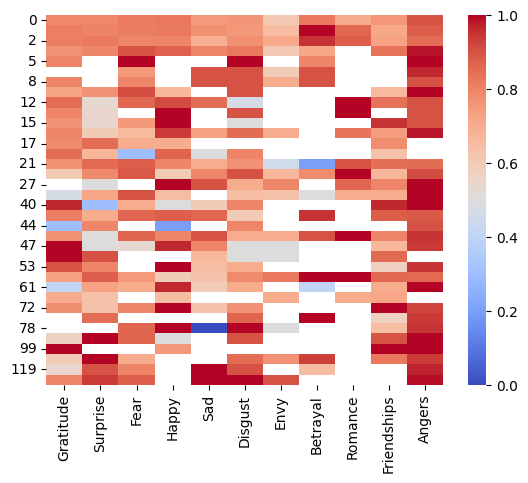

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

sentimientos = df1.drop('Personaje', axis=1)

# Crear el mapa de calor
sns.heatmap(sentimientos, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()


In [254]:
df = df1
column_means = df.mean()
# Rellena los valores NaN con la media de cada columna


/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_24665/2801672585.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


In [255]:
df.set_index("Personaje", inplace=True)


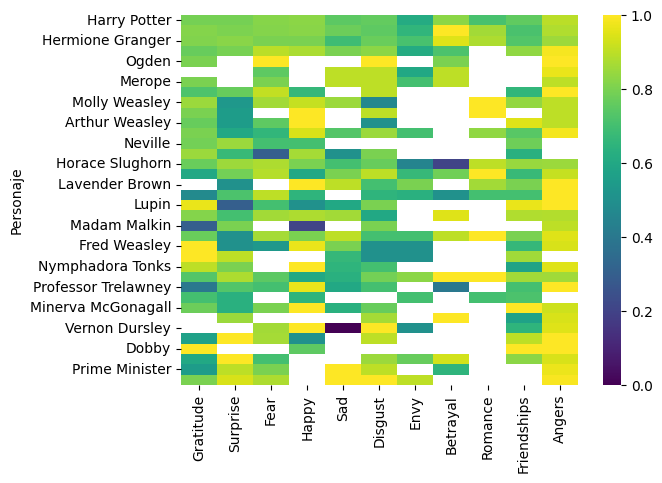

In [256]:

sns.heatmap(df, cmap="viridis")
plt.show()

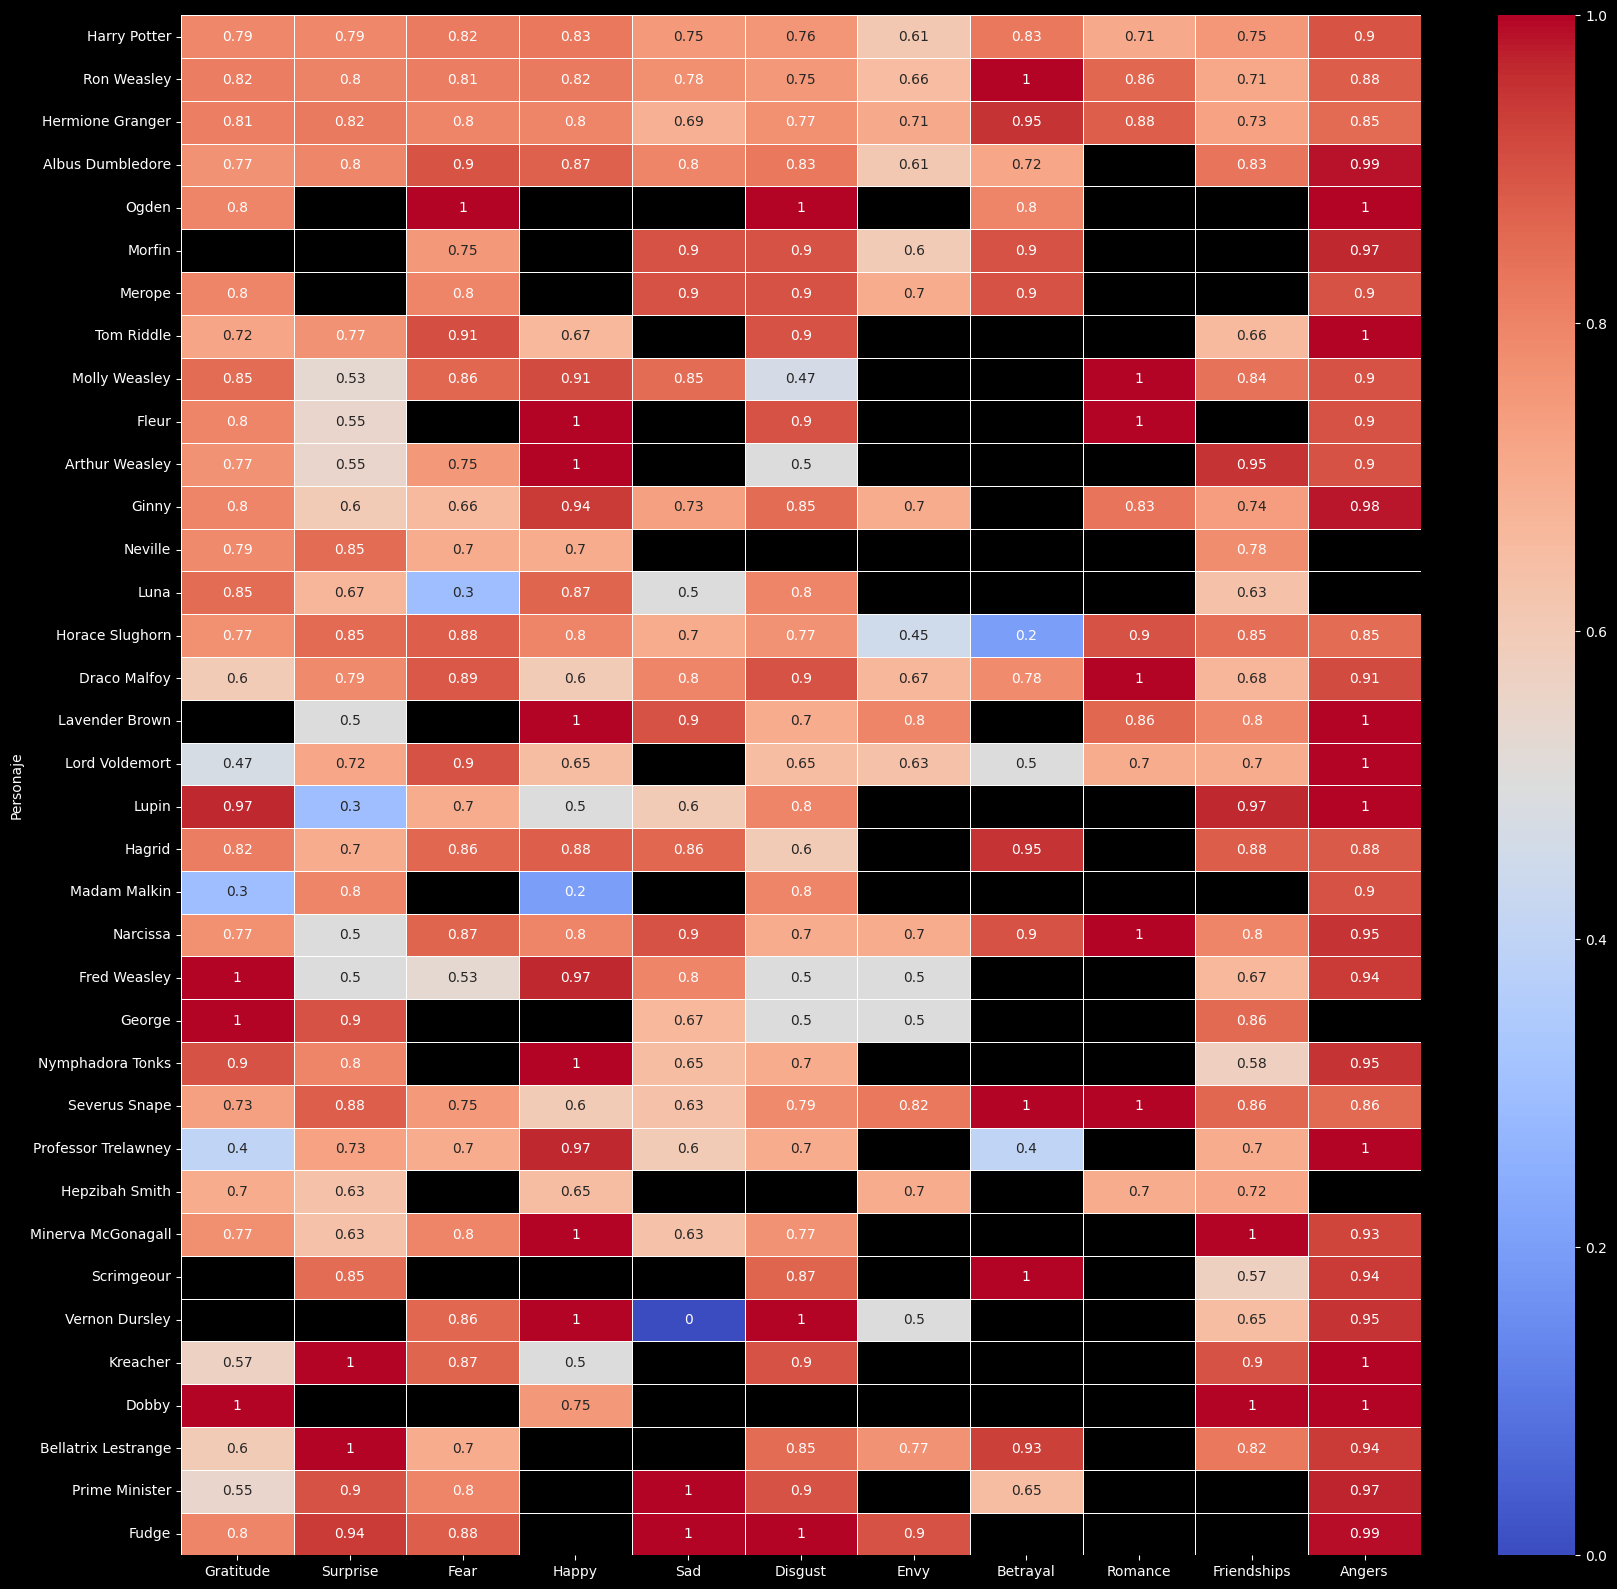

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el tamaño de la figura
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 20))

# Generar el mapa de calor
sns.heatmap(data=df1, cmap='coolwarm', annot=True, linewidths=0.5, ax=ax)

# Mostrar el mapa de calor
plt.show()
fig.savefig('heatmap.png', dpi=300)